# Logger Usage

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](ここに以下の書式でURLを入れる) 
[![github](https://badgen.net/badge/:status/View%20On%20Github/black?icon=github&label)](https://github.com/AtomScott/SoccerTrack)
[![badge](https://img.shields.io/badge/launch-binder-579ACA.svg?logo=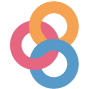)](https://)

---

This tutorial demonstrates how to use the loggers provided with `SoccerTrack`. 

In [1]:
from soccertrack.logger import logger

# The default level is INFO so debug messages are not printed
logger.debug("That's it, beautiful and simple logging!") 

# The following messages are printed
logger.info("This is an info message")
logger.success("success!")
logger.warning("I am warning you Github copilot!")
logger.error("I am error you Github copilot!")
logger.critical("Fire in the hole!")

IPython:0007  💬| This is an info message 
IPython:0008  ✅| success! 
IPython:0009  🤔| I am warning you Github copilot! 
IPython:0010  ❌| I am error you Github copilot! 
IPython:0011  🔥| Fire in the hole! 


In [2]:
from soccertrack.logger import set_log_level

# set the log level to DEBUG
set_log_level('DEBUG') 
logger.debug("That's it, beautiful and simple logging!") 

# set the log level to CRITICAL
set_log_level('critical') # <- using lower case is OK
logger.debug("That's it, beautiful and simple logging!")
logger.critical("Fire in the hole!")

IPython:0005  🐛| That's it, beautiful and simple logging! 
IPython:0010  🔥| Fire in the hole! 


## Classes

In [3]:
from soccertrack.logger import LoggerMixin

class Hello(LoggerMixin):
    def __init__(self):
        super().__init__()

    def world(self):
        self.logger.info("hello world")

hello = Hello()
hello.world() # <- this won't print anything because the log level is set to CRITICAL

# set the log level to INFO
set_log_level('INFO')
hello.world() # <- this will print the message 

Hello:world:0008  💬| hello world 


## Tqdm

SoccerTrack wraps `tqdm` to provide a progress bar that is only visible when it matches the currently set verbosity level.

Below is a snippet of the implemented code. As you can see there is an extra parameter `level` which can be used to set the verbosity level. The default value is "INFO".

``` python
def tqdm(*args, **kwargs, level="INFO"):
    LOG_LEVEL = os.environ.get("LOG_LEVEL", "INFO")
    enable = logger.level(LOG_LEVEL).no <= logger.level(level.upper()).no
    kwargs.update({"disable" : not enable})
    return tqdm(*args, **kwargs)
```

In [4]:
import time
from soccertrack.logger import tqdm

# The progress bar is not visible
for x in tqdm(range(100), level="DEBUG"):
    if x % 20 == 0:
        logger.critical("Iterating #{}", x)
    time.sleep(0.1)

IPython:0007  🔥| Iterating #0 
IPython:0007  🔥| Iterating #20 
IPython:0007  🔥| Iterating #40 
IPython:0007  🔥| Iterating #60 
IPython:0007  🔥| Iterating #80 


In [5]:
# The progress bar is visible
set_log_level('DEBUG') 
for x in tqdm(range(100), level="DEBUG"):
    if x % 20 == 0:
        logger.critical("Iterating #{}", x)
    time.sleep(0.1)

  0%|          | 0/100 [00:00<?, ?it/s]

IPython:0005  🔥| Iterating #0 


 20%|██        | 20/100 [00:02<00:08,  9.49it/s]

IPython:0005  🔥| Iterating #20 


 40%|████      | 40/100 [00:04<00:06,  9.54it/s]

IPython:0005  🔥| Iterating #40 


 60%|██████    | 60/100 [00:06<00:04,  9.51it/s]

IPython:0005  🔥| Iterating #60 


 80%|████████  | 80/100 [00:08<00:02,  9.50it/s]

IPython:0005  🔥| Iterating #80 


100%|██████████| 100/100 [00:10<00:00,  9.51it/s]


In [6]:
# A nice way to describe progress using pbar.set_description()
set_log_level('INFO') 
for x in (pbar:=tqdm(range(100), level="INFO")):
    if x % 20 == 0:
        pbar.set_description(f"Iterating #{x}")
    time.sleep(0.1)

Iterating #80: 100%|██████████| 100/100 [00:10<00:00,  9.52it/s]


## Other

In [7]:
from soccertrack.logger import inspect

set_log_level('INFO') 
inspect(dir, level="DEBUG")
inspect(dir, level="INFO")
inspect(int, level="WARNING")
inspect(inspect, level="ERROR")

inspect:0137  💬| Inspecting: (<built-in function dir>,) 


╭────────────────── <built-in function dir> ───────────────────╮
│ def dir(...)                                                 │
│                                                              │
│ dir([object]) -> list of strings                             │
│                                                              │
│ 29 attribute(s) not shown. Run inspect(inspect) for options. │
╰──────────────────────────────────────────────────────────────╯

inspect:0137  🤔| Inspecting: (<class 'int'>,) 


╭───────────────────── <class 'int'> ──────────────────────╮
│ class int(...)                                           │
│                                                          │
│ int([x]) -> integer                                      │
│ int(x, base=10) -> integer                               │
│                                                          │
│ denominator = <attribute 'denominator' of 'int' objects> │
│        imag = <attribute 'imag' of 'int' objects>        │
│   numerator = <attribute 'numerator' of 'int' objects>   │
│        real = <attribute 'real' of 'int' objects>        │
╰──────────────────────────────────────────────────────────╯

inspect:0137  ❌| Inspecting: (<function inspect at 0x127bca280>,) 


╭───────────── <function inspect at 0x127bca280> ──────────────╮
│ def inspect(*args, level: str = 'INFO', **kwargs) -> None:   │
│                                                              │
│ Wrapper for rich.inspect that uses the logger's level.       │
│                                                              │
│ 35 attribute(s) not shown. Run inspect(inspect) for options. │
╰──────────────────────────────────────────────────────────────╯